##Predicting Graduate Admissions

The dataset contains records of 500 students and their chance of admit.

The following features are given in the dataset:

GRE Score (out of 340) - The student's GRE Score

TOEFL Score (out of 120) - The student's TOEFL score

University rating (1 to 5) - The student's undergrad university rating

SOP (1 to 5) - The student's SOP rating

LOR (1 to 5) - The student's LOR rating

CGPA (out of 10) - The student's undergrad CGPA

Research (0 or 1) - If the student has any research experience or not

Chance of Admit (0 to 1) - The probability of the student getting an admit

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
dataset = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
dataset.drop('Serial No.', axis=1, inplace=True)

In [4]:
dataset.shape

(500, 8)

In [5]:
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


There is no missing value in our dataset.

In [7]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


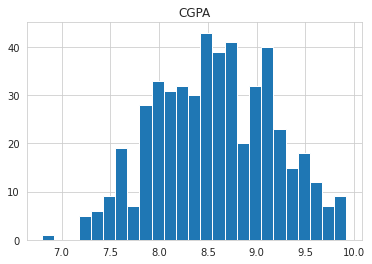

In [8]:
plt.hist(dataset['CGPA'], bins = 25)
plt.title('CGPA')
plt.show()

The most of the students score between 8.0 and 9.0.

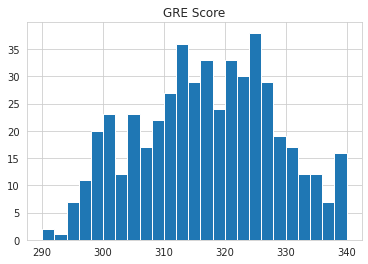

In [9]:
plt.hist(dataset['GRE Score'], bins =25)
plt.title('GRE Score')
plt.show()

The majority of students score between 310 and 330. This is pretty common since anything lower than 310 reduces the chances of the student getting an admit and anything above 330 will greatly increase the chances of getting an admit.



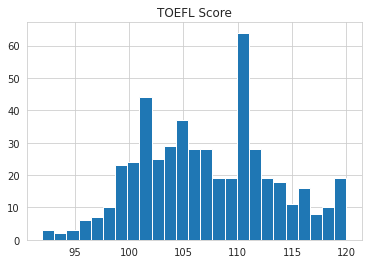

In [10]:
plt.hist(dataset['TOEFL Score'], bins = 25)
plt.title('TOEFL Score')
plt.show()

On the TOFEL exam, the vast majority of students receive scores between 100 and 110.

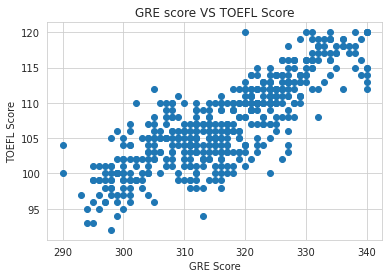

In [11]:
plt.scatter(dataset['GRE Score'],dataset['TOEFL Score'])
plt.title('GRE score VS TOEFL Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.show()

The general trend is that students who score higher on the GRE tend to perform better on the TOEFL.

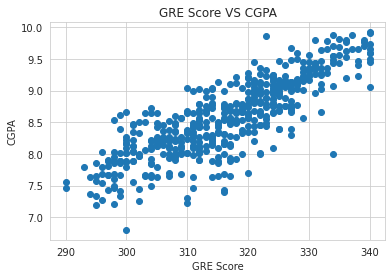

In [12]:
plt.scatter(dataset['GRE Score'],dataset['CGPA'])
plt.title('GRE Score VS CGPA')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()

Students with higher CGPA have a higher score in GRE.



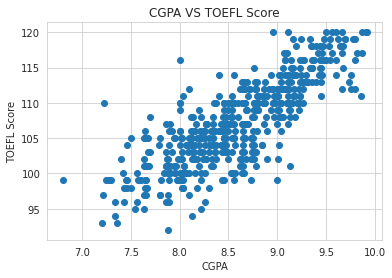

In [13]:
plt.scatter(dataset['CGPA'],dataset['TOEFL Score'])
plt.title('CGPA VS TOEFL Score')
plt.xlabel('CGPA')
plt.ylabel('TOEFL Score')
plt.show()

Likewise, a greater TOFEL score is equivalent to a better CGPA.

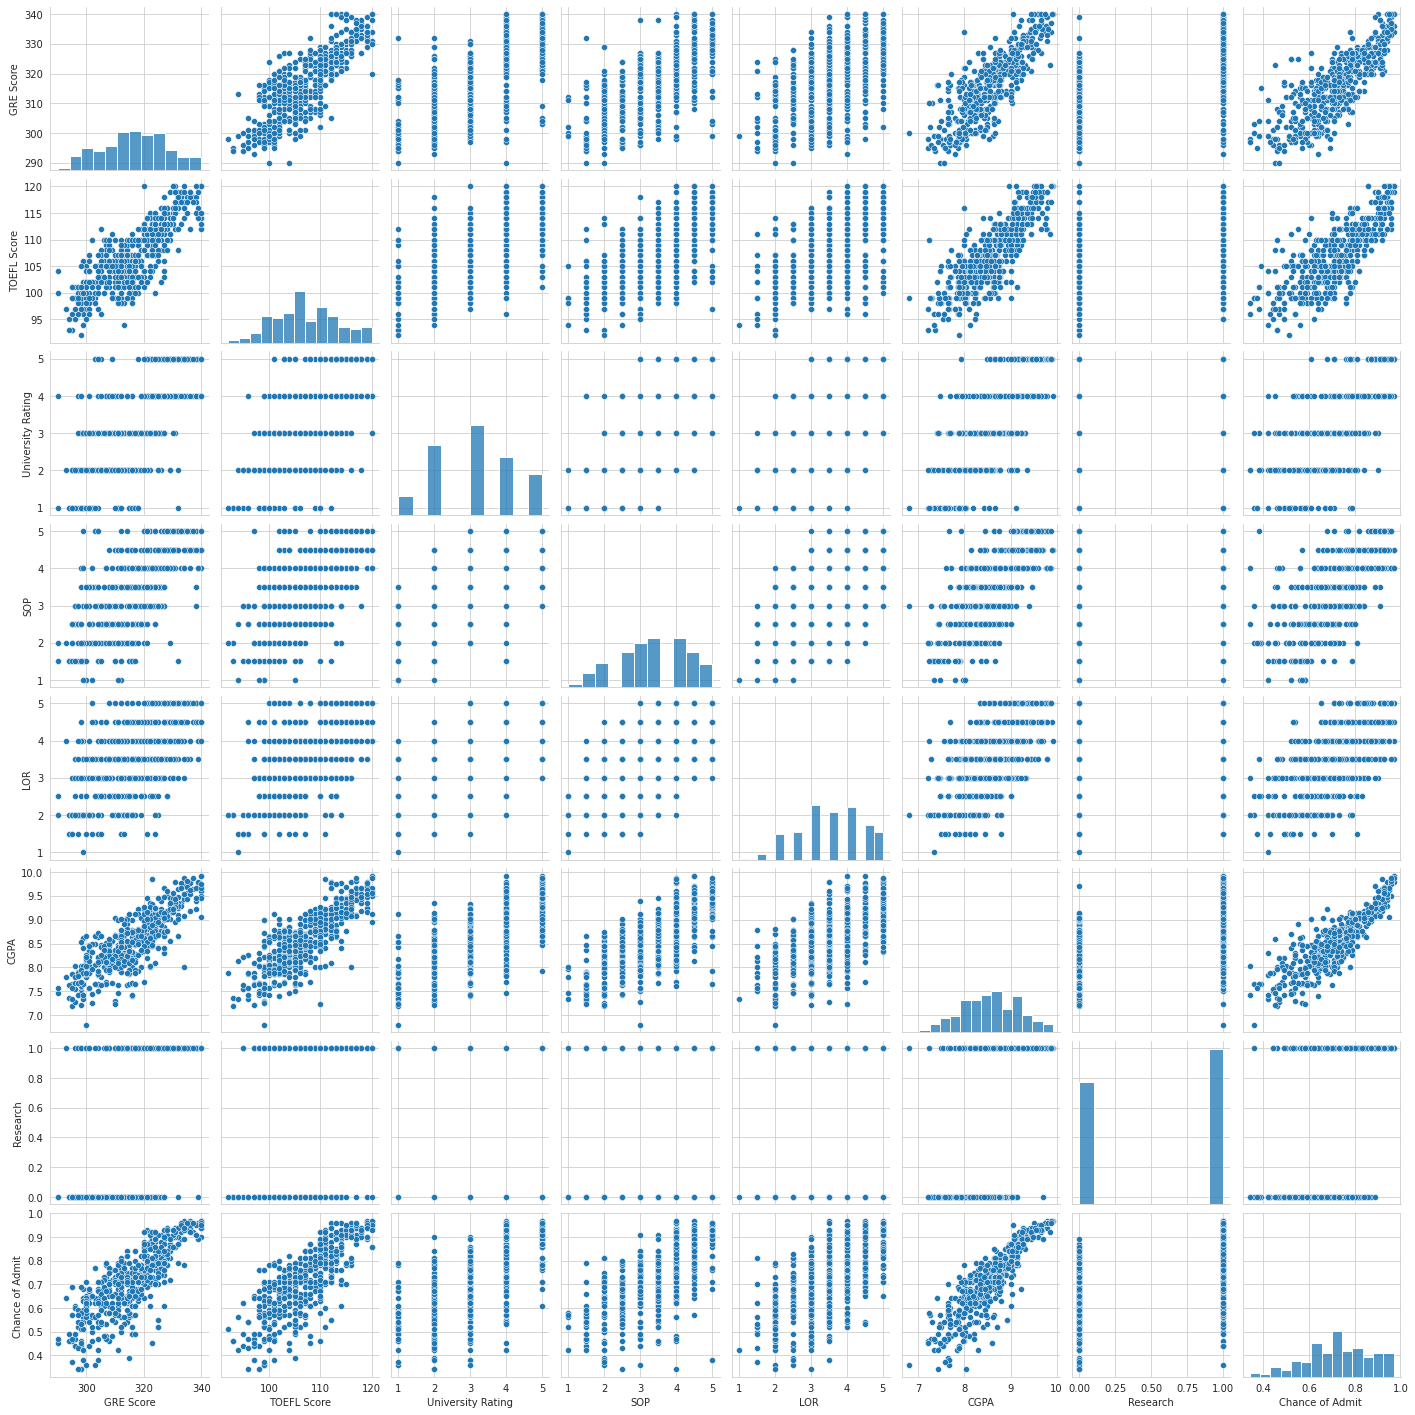

In [14]:
sns.pairplot(dataset)

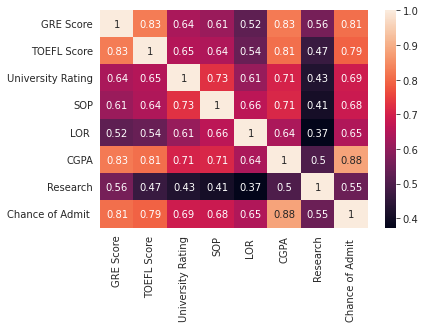

In [15]:
corr = dataset.corr()
sns.heatmap(corr, annot=True)

We can see from the above two graphs that there is a strong correlation between CGPA and chance of admit. Surprisingly, research experience is not that important.

##Modeling

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [36]:
X = dataset.drop('Chance of Admit ', axis=1).copy()
y = dataset['Chance of Admit '].copy()

In [37]:
print(X)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]


In [38]:
print(y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64


## Splitting the dataset into the Training set and Test set

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.8256306039919488

##Support Vector Regression

In [42]:
svr = SVR(kernel = 'rbf')
svr.fit(X, y)

SVR()

In [43]:
y_pred = svr.predict(X_test)
r2_score(y_test, y_pred)

0.6795708953491536

##Random Forest

In [46]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
rfr_pred = rfr.predict(X_test)
r2_score(y_test, rfr_pred)

0.8093559157293881

Checking the impotances of the different parameters

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


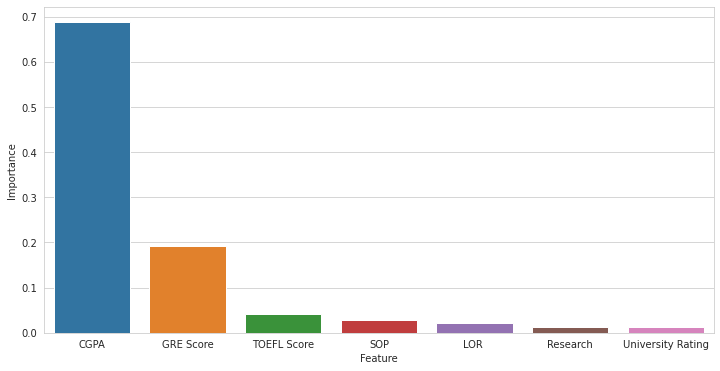

In [48]:
imp = pd.DataFrame(sorted(zip(rfr.feature_importances_, X_train.columns), reverse=True), columns=['Importance', 'Feature'])
plt.figure(figsize=(12,6))
sns.barplot(imp['Feature'], imp['Importance'])

The model must be tuned so that the model does not depend too much on just one feature



In [ ]:
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])

In [ ]:
rfr = RandomForestRegressor(n_jobs = -1)
param_grid = {'n_estimators': [200, 500, 800], 
                    'max_depth': [4, 5, 6, 7], 
                    'min_samples_split': [2, 3, 4, 5],
                    'max_features': [1,2,3,4,5,6]}
rfr_grid = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3,n_jobs = -1)
rfr_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [200, 500, 800]})

In [ ]:
rfr_grid.best_params_

{'max_depth': 6,
 'max_features': 3,
 'min_samples_split': 4,
 'n_estimators': 500}

In [ ]:
rfr.set_params(**rfr_grid.best_params_)

RandomForestRegressor(max_depth=6, max_features=3, min_samples_split=4,
                      n_estimators=500, n_jobs=-1)

In [ ]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=3, min_samples_split=4,
                      n_estimators=500, n_jobs=-1)

In [ ]:
rfr_pred = rfr.predict(X_test)
r2_score(y_test, rfr_pred)

0.8231174048571406

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


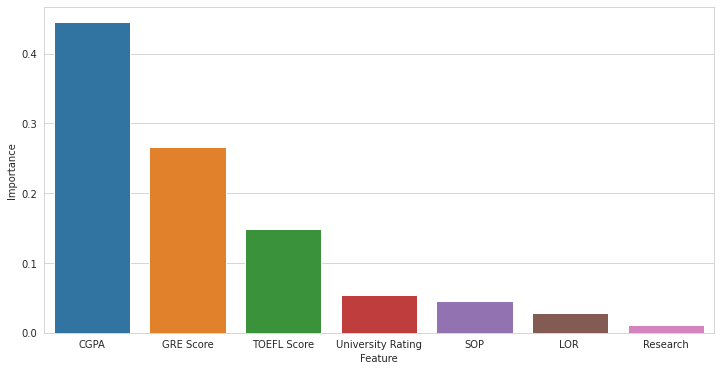

In [ ]:
imp = pd.DataFrame(sorted(zip(rfr.feature_importances_, X_train.columns), reverse=True), columns=['Importance', 'Feature'])
plt.figure(figsize=(12,6))
sns.barplot(imp['Feature'], imp['Importance'])

##Conclusion

It is interesting to see that the probability of getting an admit depends majorly on the student's CGPA, GRE and TOEFL scores. SOP and LOR have relatively lower importance and the research experience has the lowest importance of all.